In [1]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"
res = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/results"

In [2]:
import pandas as pd
import os

## Medication Patient Data

## Filter Meds

### Med 1

In [3]:
# Male, 50-100, WHITE

In [4]:
gender = "M"
age_b = 50
age_a = 100
ethnicity = "WHITE"
stratify_prefix = f"{age_b}-{age_a}_{gender}_{ethnicity}"


In [5]:
med1 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med1_vectorized.csv"))

In [6]:
h_adm_1 = med1.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
med1 = med1[med1.HADM_ID.isin(h_adm_1)]

In [7]:
med1 = med1.drop(columns=["Unnamed: 0"])

In [8]:
med1 = med1[med1["AGE"]>=age_b]
med1 = med1[med1["AGE"]<=age_a]

In [9]:
med1 = med1[med1["GENDER"]==gender]
med1 = med1[med1["ETHNICITY"]==ethnicity]

In [10]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
154,711,2100-03-06,M,2185-05-26 00:00:00,1,226361,158767,270525.0,2185-03-22 11:55:00,2185-03-22 11:56:00,...,Pre-Admission Intake,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:09:00,85.0
155,711,2100-03-06,M,2185-05-26 00:00:00,1,225158,158767,270525.0,2185-03-22 12:17:00,2185-03-22 12:18:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:31:00,85.0
156,711,2100-03-06,M,2185-05-26 00:00:00,1,221906,158767,270525.0,2185-03-22 11:30:00,2185-03-22 14:10:00,...,Norepinephrine,Norepinephrine,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 04:23:00,85.0
157,711,2100-03-06,M,2185-05-26 00:00:00,1,220949,158767,270525.0,2185-03-22 14:13:00,2185-03-22 14:14:00,...,Dextrose 5%,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:27:00,85.0
158,711,2100-03-06,M,2185-05-26 00:00:00,1,225943,158767,270525.0,2185-03-22 12:00:00,2185-03-22 14:14:00,...,Solution,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:27:00,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0


In [11]:
d_m_l_doc = pd.read_csv(os.path.join(data, "mimiciii", "1.4","preprocessed", "mapping_med_itemid_doc.csv")).drop(columns=["Unnamed: 0"])

In [12]:
dict_d_m_l = d_m_l_doc.to_dict("records")
res_dict_mapping_med = {
    v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']
}

<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/109719822.py:3: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  v:k["Medication"] for k in dict_d_m_l for v in [int(id) for id in k["ITEMID_with_manual"][1:-1].split(",") if id is not '']


In [13]:
med1["MIMICExtractLabel"] = med1.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [14]:
med1

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
154,711,2100-03-06,M,2185-05-26 00:00:00,1,226361,158767,270525.0,2185-03-22 11:55:00,2185-03-22 11:56:00,...,Pre-Admission Intake,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:09:00,85.0,Pre-Admission Intake
155,711,2100-03-06,M,2185-05-26 00:00:00,1,225158,158767,270525.0,2185-03-22 12:17:00,2185-03-22 12:18:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:31:00,85.0,NaCl 0.9%
156,711,2100-03-06,M,2185-05-26 00:00:00,1,221906,158767,270525.0,2185-03-22 11:30:00,2185-03-22 14:10:00,...,Norepinephrine,metavision,inputevents_mv,Medications,mg,Solution,NaN,0 days 04:23:00,85.0,Norepinephrine
157,711,2100-03-06,M,2185-05-26 00:00:00,1,220949,158767,270525.0,2185-03-22 14:13:00,2185-03-22 14:14:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:27:00,85.0,Dextrose 5%
158,711,2100-03-06,M,2185-05-26 00:00:00,1,225943,158767,270525.0,2185-03-22 12:00:00,2185-03-22 14:14:00,...,Solution,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:27:00,85.0,Solution
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323002,44128,2098-07-25,M,NaN,0,225166,141304,253669.0,2149-06-11 02:25:00,2149-06-11 19:59:00,...,Potassium Chloride - KCL,metavision,inputevents_mv,Medications,mEq,Solution,NaN,3 days 04:38:00,51.0,Potassium Chloride
323003,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 10:43:00,51.0,NaCl 0.9%
323004,44128,2098-07-25,M,NaN,0,225834,141304,253669.0,2149-06-11 20:07:00,2149-06-12 02:04:00,...,K Phos,metavision,inputevents_mv,Medications,mmol,Solution,NaN,3 days 10:43:00,51.0,K Phos
323005,44128,2098-07-25,M,NaN,0,223258,141304,253669.0,2149-06-12 14:40:00,2149-06-12 14:41:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,3 days 23:20:00,51.0,Insulin - Regular


### Med 2

In [16]:
med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/27638116.py:1: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  med2 = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "med2_vectorized.csv"))


In [17]:
h_adm_2 = med2.sort_values(["SUBJECT_ID", "STARTTIME"]).groupby("SUBJECT_ID").nth(0)["HADM_ID"].to_list()
adm_2 = med2[med2.HADM_ID.isin(h_adm_2)]

In [18]:
med2 = med2.drop(columns=["Unnamed: 0"])

In [19]:
med2 = med2[med2["AGE"]>=age_b]
med2 = med2[med2["AGE"]<=age_a]

In [20]:
med2 = med2[med2["GENDER"]==gender]
med2 = med2[med2["ETHNICITY"]==ethnicity]

In [21]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE
114,711,2100-03-06,M,2185-05-26 00:00:00,1,225158,158767,270525.0,2185-03-22 12:42:00,2185-03-22 12:43:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:56:00,85.0
115,711,2100-03-06,M,2185-05-26 00:00:00,1,220949,158767,270525.0,2185-03-22 14:36:00,2185-03-22 14:37:00,...,Dextrose 5%,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:50:00,85.0
116,711,2100-03-06,M,2185-05-26 00:00:00,1,225883,158767,270525.0,2185-03-22 20:00:00,2185-03-22 20:01:00,...,Meropenem,Meropenem,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,0 days 10:14:00,85.0
117,711,2100-03-06,M,2185-05-26 00:00:00,1,223258,158767,270525.0,2185-03-22 21:00:00,2185-03-23 00:00:00,...,Insulin - Regular,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 14:13:00,85.0
118,711,2100-03-06,M,2185-05-26 00:00:00,1,225975,158767,270525.0,2185-03-23 00:00:00,2185-03-23 00:01:00,...,Heparin Sodium (Prophylaxis),Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 14:14:00,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237602,44128,2098-07-25,M,NaN,0,220949,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Dextrose 5%,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:58:00,51.0
237603,44128,2098-07-25,M,NaN,0,225850,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Cefazolin,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 00:58:00,51.0
237604,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:00:00,2149-06-12 06:00:00,...,NaCl 0.9%,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:39:00,51.0
237605,44128,2098-07-25,M,NaN,0,225823,141304,253669.0,2149-06-12 06:00:00,2149-06-12 19:16:00,...,D5 1/2NS,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 03:55:00,51.0


In [22]:
med2["MIMICExtractLabel"] = med2.apply(lambda r: res_dict_mapping_med[r["ITEMID"]] if r["ITEMID"] in res_dict_mapping_med else r["LABEL"], axis=1)

In [23]:
med2

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,ITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID,MedTimeFromAdmit,AGE,MIMICExtractLabel
114,711,2100-03-06,M,2185-05-26 00:00:00,1,225158,158767,270525.0,2185-03-22 12:42:00,2185-03-22 12:43:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 02:56:00,85.0,NaCl 0.9%
115,711,2100-03-06,M,2185-05-26 00:00:00,1,220949,158767,270525.0,2185-03-22 14:36:00,2185-03-22 14:37:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,0 days 04:50:00,85.0,Dextrose 5%
116,711,2100-03-06,M,2185-05-26 00:00:00,1,225883,158767,270525.0,2185-03-22 20:00:00,2185-03-22 20:01:00,...,Meropenem,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,0 days 10:14:00,85.0,Meropenem
117,711,2100-03-06,M,2185-05-26 00:00:00,1,223258,158767,270525.0,2185-03-22 21:00:00,2185-03-23 00:00:00,...,Insulin - Regular,metavision,inputevents_mv,Medications,units,Solution,NaN,0 days 14:13:00,85.0,Insulin - Regular
118,711,2100-03-06,M,2185-05-26 00:00:00,1,225975,158767,270525.0,2185-03-23 00:00:00,2185-03-23 00:01:00,...,Heparin Sodium (Prophylaxis),metavision,inputevents_mv,Medications,dose,Solution,NaN,0 days 14:14:00,85.0,Heparin Sodium (Prophylaxis)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237602,44128,2098-07-25,M,NaN,0,220949,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Dextrose 5%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 00:58:00,51.0,Dextrose 5%
237603,44128,2098-07-25,M,NaN,0,225850,141304,253669.0,2149-06-11 16:18:00,2149-06-11 16:19:00,...,Cefazolin,metavision,inputevents_mv,Antibiotics,dose,Solution,NaN,3 days 00:58:00,51.0,Cefazolin
237604,44128,2098-07-25,M,NaN,0,225158,141304,253669.0,2149-06-11 20:00:00,2149-06-12 06:00:00,...,NaCl 0.9%,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,3 days 14:39:00,51.0,NaCl 0.9%
237605,44128,2098-07-25,M,NaN,0,225823,141304,253669.0,2149-06-12 06:00:00,2149-06-12 19:16:00,...,D5 1/2NS,metavision,inputevents_mv,Fluids/Intake,mL,Solution,NaN,4 days 03:55:00,51.0,D5 1/2NS


## Filter Labs

In [24]:
# labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "labs_vectorized.csv"))
labs = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", "lab_patient_data_mimic_extract_2.csv"))
# labs = labs.rename(columns={"SUBJECT_ID_x":"SUBJECT_ID"})

In [25]:
# (0,5), (1, 6), 

Text(0.5, 1.0, 'Distribution of age')

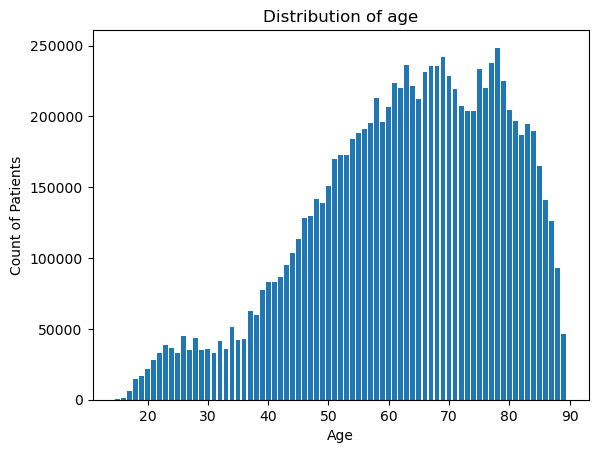

In [26]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

In [27]:
labs = labs.drop(columns=["Unnamed: 0"])
labs
# 8874120

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
0,100001.0,2117-09-11 11:46:00,2117-09-11 15:50:00,1.9,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,1.9,mg/dL
1,100001.0,2117-09-11 11:46:00,2117-09-11 19:31:00,2.0,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.0,mg/dL
2,100001.0,2117-09-11 11:46:00,2117-09-11 19:31:00,32.2,Hematocrit,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220545,ENGL,DIVORCED,PROTESTANT QUAKER,58526,32.2,%
3,100001.0,2117-09-11 11:46:00,2117-09-12 00:17:00,1.9,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,1.9,mg/dL
4,100001.0,2117-09-11 11:46:00,2117-09-12 04:36:00,2.0,Magnesium,CLINIC REFERRAL/PREMATURE,EMERGENCY,35.0,NaN,DIABETIC KETOACIDOSIS,...,1,0,Private,220635,ENGL,DIVORCED,PROTESTANT QUAKER,58526,2.0,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [28]:
labs = labs[labs.HADM_ID.isin(h_adm_1+h_adm_2)]

In [29]:
labs = labs[labs["AGE"]>=age_b]
labs = labs[labs["AGE"]<=age_a]

In [30]:
labs = labs[labs["GENDER"]==gender]
labs = labs[labs["ETHNICITY"]==ethnicity]

In [31]:
labs.shape

(1227563, 31)

Text(0.5, 1.0, 'Distribution of age')

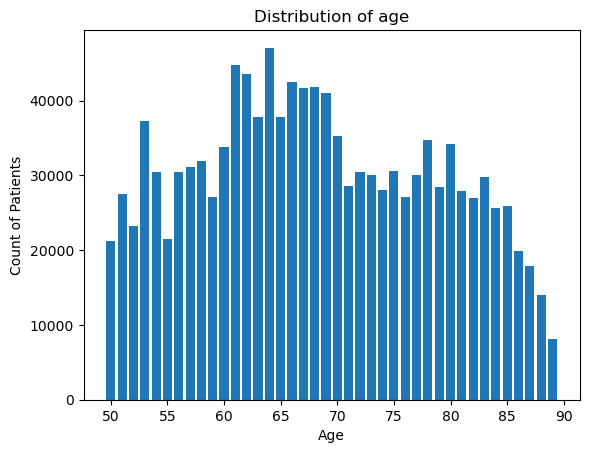

In [32]:
import matplotlib.pyplot as plt
t = labs[labs["AGE"]<100]
t = pd.DataFrame(t["AGE"].value_counts()).reset_index().sort_values(["index"])
plt.bar(t["index"], t["AGE"])
plt.xlabel('Age')
plt.ylabel('Count of Patients')
plt.title('Distribution of age')

## Pairs

In [33]:
counts = med1.groupby(["MIMICExtractLabel"]).count()[["HADM_ID"]].sort_values("HADM_ID", ascending=False)
counts

,HADM_ID
MIMICExtractLabel,
NaCl 0.9%,5067
Dextrose 5%,4552
PO Intake,4324
Solution,3634
Insulin - Regular,2819
...,...
Boost Glucose Control (3/4),1
Boost Glucose Control (1/2),1
Replete (2/3),1


In [34]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))
meditems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))

In [35]:
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,HAS_CHARTEVENTS_DATA,HOSPITAL_EXPIRE_FLAG,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM
238,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,1.9,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,1.9,mg/dL
239,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,21.3,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,21.3,%
240,100003.0,2150-04-17 15:34:00,2150-04-17 21:04:00,28.0,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,28.0,%
241,100003.0,2150-04-17 15:34:00,2150-04-18 03:20:00,31.8,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,31.8,%
242,100003.0,2150-04-17 15:34:00,2150-04-18 06:25:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,1,0,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,2.1,mg/dL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,1,0,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL


In [36]:
med1["STARTTIME"] = pd.to_datetime(med1["STARTTIME"])
med1["ENDTIME"] = pd.to_datetime(med1["ENDTIME"])
med1["ADMITTIME"] = pd.to_datetime(med1["ADMITTIME"])
med1["MedTimeFromAdmit"] = med1["ENDTIME"]-med1["ADMITTIME"]
med2["STARTTIME"] = pd.to_datetime(med2["STARTTIME"])
med2["ENDTIME"] = pd.to_datetime(med2["ENDTIME"])
med2["ADMITTIME"] = pd.to_datetime(med2["ADMITTIME"])
med2["MedTimeFromAdmit"] = med2["ENDTIME"]-med2["ADMITTIME"]
labs["CHARTTIME"] = pd.to_datetime(labs["CHARTTIME"])
labs["ADMITTIME"] = pd.to_datetime(labs["ADMITTIME"])
labs["LabTimeFromAdmit"] = labs["CHARTTIME"]-labs["ADMITTIME"]

In [37]:
med1["hours_in"] = med1["MedTimeFromAdmit"].dt.total_seconds()/3600
labs["hours_in"] = labs["LabTimeFromAdmit"].dt.total_seconds()/3600

In [38]:
labs["MIMICExtractName"] = labs["MIMICExtractName"].apply(lambda r: r.strip())
labs

,HADM_ID,ADMITTIME,CHARTTIME,VALUENUM,MIMICExtractName,ADMISSION_LOCATION,ADMISSION_TYPE,AGE,DEATHTIME,DIAGNOSIS,...,INSURANCE,ITEMID,LANGUAGE,MARITAL_STATUS,RELIGION,SUBJECT_ID,VALUE,VALUEUOM,LabTimeFromAdmit,hours_in
238,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,1.9,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,1.9,mg/dL,0 days 03:07:00,3.116667
239,100003.0,2150-04-17 15:34:00,2150-04-17 18:41:00,21.3,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,21.3,%,0 days 03:07:00,3.116667
240,100003.0,2150-04-17 15:34:00,2150-04-17 21:04:00,28.0,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,28.0,%,0 days 05:30:00,5.500000
241,100003.0,2150-04-17 15:34:00,2150-04-18 03:20:00,31.8,Hematocrit,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220545,ENGL,SINGLE,NOT SPECIFIED,54610,31.8,%,0 days 11:46:00,11.766667
242,100003.0,2150-04-17 15:34:00,2150-04-18 06:25:00,2.1,Magnesium,EMERGENCY ROOM ADMIT,EMERGENCY,60.0,NaN,UPPER GI BLEED,...,Private,220635,ENGL,SINGLE,NOT SPECIFIED,54610,2.1,mg/dL,0 days 14:51:00,14.850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844609,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,12.6,Hemoglobin,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220228,ENGL,MARRIED,JEWISH,40370,12.6,g/dl,5 days 02:51:00,122.850000
9844610,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,114.0,Glucose,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220621,ENGL,MARRIED,JEWISH,40370,114.0,mg/dL,5 days 02:51:00,122.850000
9844611,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,138.0,Sodium,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,220645,ENGL,MARRIED,JEWISH,40370,138.0,mEq/L,5 days 02:51:00,122.850000
9844612,199999.0,2136-04-04 23:37:00,2136-04-10 02:28:00,539.0,Platelets,CLINIC REFERRAL/PREMATURE,EMERGENCY,88.0,NaN,PNEUMONIA,...,Medicare,227457,ENGL,MARRIED,JEWISH,40370,539.0,K/uL,5 days 02:51:00,122.850000


In [39]:
lab_unique_names = labs[labs.HADM_ID.isin(med1.HADM_ID.unique())]["MIMICExtractName"].unique()
lab_unique_names

array(['Magnesium', 'Hematocrit', 'Albumin', 'Creatinine', 'Bilirubin',
       'Potassium', 'Hemoglobin', 'Lipase', 'Glucose',
       'Alanine aminotransferase', 'Sodium', 'Platelets',
       'Asparate aminotransferase', 'Prothrombin time INR', 'PTT',
       'Calcium', 'Calcium ionized', 'Potassium serum', 'Lactic acid',
       'Hemoglobin percent', 'Glucose urine', 'Amylase',
       'Creatinine urine', 'Potassium, Urine', 'Sodium, Urine',
       'Vitamin B12', 'Uric Acid', 'Calcium urine', 'Glucose, CSF',
       'Uric Acid, Urine', 'Red blood cell', 'Amylase, Ascites',
       'Glucose, Pleural', 'Amylase, Body Fluid', 'Glucose, Body Fluid',
       'Amylase, Pleural', 'Glucose, Ascites', 'Magnesium, Urine',
       'Creatinine ascites', 'Bilirubin, Total, Ascites',
       'Creatinine body fluid', 'Bilirubin, Total, Body Fluid',
       'Creatinine pleural', 'Hemoglobin C', 'Hemoglobin F',
       'Hemoglobin A2', 'Prolactin', 'Glucose, Urine',
       'Bilirubin, Total, Pleural', 'Potassiu

In [40]:
t_lab_itemids = {'ALT': {'Alanine aminotransferase': [50861, 769, 220644]},
 'ANA': {'Fraction inspired oxygen': [189]},
 'AST': {'Asparate aminotransferase': [50878, 770, 220587]},
 'Hemoglobin': {'Hemoglobin percent': [50852],
  'Hemoglobin C': [51224],
  'Hemoglobin F': [51225],
  'Hemoglobin A2': [51223],
  'Hemoglobin': [814, 220228, 51222, 50811]},
 'INR': {'Prothrombin time INR': [51237, 815, 1530, 227467]},
 'bilirubin': {'Bilirubin': [51465,
   50883,
   803,
   225651,
   50885,
   1538,
   848,
   225690,
   50884],
#   'Bilirubin, Total, Pleural': [51049],
#   'Bilirubin, Total, Body Fluid': [51028],
#   'Bilirubin, Total, Ascites': [50838]
  },
 'calcium': {'Calcium': [786, 1522, 3746, 51029, 50893, 225625],
  'Calcium ionized': [50808, 816, 225667, 3766],
#   'Calcium urine': [51066, 51077]
  },
 'creatinine': {'Creatinine': [791, 1525, 220615, 50912],
  'Creatinine ascites': [50841],
#   'Creatinine body fluid': [51032],
#   'Creatinine pleural': [51052],
#   'Creatinine urine': [51082]
},
 'glucose': {'Glucose': [50931,
   807,
   811,
   1529,
   50809,
   3745,
   225664,
   220621,
   226537],
#   'Glucose urine': [51478],
#   'Glucose, CSF': [51014],
#   'Estimated Actual Glucose': [51529],
#   'Glucose, Urine': [51084],
#   'Glucose, Pleural': [51053],
#   'Glucose, Joint Fluid': [51022],
#   'Glucose, Ascites': [50842],
#   'Glucose, Body Fluid': [51034]
},
 'lactic acid': {'Lactic acid': [818, 225668, 1531]},
 'magnesium': {'Magnesium': [50960], 'Magnesium, Urine': [51088]},
 'platelets': {'Platelets': [51265, 828, 227457], 'Large Platelets': [51240]},
 'potassium': {'Potassium': [829, 1535, 227464, 50971, 50822],
#   'Potassium serum': [227442],
#   'Potassium, Body Fluid': [51041],
#   'Potassium, Pleural': [51057],
#   'Potassium, Stool': [51064],
#   'Potassium, Urine': [51097],
#   'Potassium, Ascites': [50847]
  },
 'sodium': {'Sodium': [837, 1536, 220645, 226534, 50983, 50824],
#   'Sodium, Ascites': [50848],
#   'Sodium, Body Fluid': [51042],
#   'Sodium, Pleural': [51058],
#   'Sodium, Stool': [51065],
#   'Sodium, Urine': [51100]
  },
 'Uric acid': {'Uric Acid': [51007], 'Uric Acid, Urine': [51105]},
 'B12': {'Vitamin B12': [51010]},
 'prolactin': {'Prolactin': [50973]},
 'Amylase': {'Amylase': [50867], 
#  'Amylase, Ascites': [50836], 'Amylase, Body Fluid': [51026],'Amylase, Joint Fluid': [51020],'Amylase, Pleural': [51047], 'Amylase, Urine': [51072]
 },
 'Lipase': {'Lipase': [50956], 
#  'Lipase, Ascites': [50844], 'Lipase, Body Fluid': [51036]
 },
 'Aptt': {'PTT': [825, 1533, 227466, 51275]}}
t_lab_itemids['Hematocrit']  = {
    'Hematocrit' : [813, 220545, 51221, 50810]
}
t_lab_itemids['Red blood cell'] = {
    'Red blood cell': [51279, 833]
}
t_lab_itemids['Albumin'] = {
    'Albumin': [50862, 772, 1521, 227456]
}
t_lab_itemids['Magnesium'] = {
    'Magnesium': [821, 1532, 220635, 50960]
}

In [41]:
d_lab_map = {k:list(v.keys()) for k, v in t_lab_itemids.items()}

In [42]:
d_lab_map["CPK"] = []
d_lab_map

{'ALT': ['Alanine aminotransferase'],
 'ANA': ['Fraction inspired oxygen'],
 'AST': ['Asparate aminotransferase'],
 'Hemoglobin': ['Hemoglobin percent',
  'Hemoglobin C',
  'Hemoglobin F',
  'Hemoglobin A2',
  'Hemoglobin'],
 'INR': ['Prothrombin time INR'],
 'bilirubin': ['Bilirubin'],
 'calcium': ['Calcium', 'Calcium ionized'],
 'creatinine': ['Creatinine', 'Creatinine ascites'],
 'glucose': ['Glucose'],
 'lactic acid': ['Lactic acid'],
 'magnesium': ['Magnesium', 'Magnesium, Urine'],
 'platelets': ['Platelets', 'Large Platelets'],
 'potassium': ['Potassium'],
 'sodium': ['Sodium'],
 'Uric acid': ['Uric Acid', 'Uric Acid, Urine'],
 'B12': ['Vitamin B12'],
 'prolactin': ['Prolactin'],
 'Amylase': ['Amylase'],
 'Lipase': ['Lipase'],
 'Aptt': ['PTT'],
 'Hematocrit': ['Hematocrit'],
 'Red blood cell': ['Red blood cell'],
 'Albumin': ['Albumin'],
 'Magnesium': ['Magnesium'],
 'CPK': []}

In [43]:
indexes = list(d_m_l_doc.groupby(["Medication", "lab result"]).count().index)

In [44]:
med_vals = [k[0].strip() for k in indexes]
labtest_vals = [k[1].strip() for k in indexes]

In [45]:
med1.MIMICExtractLabel.value_counts()

NaCl 0.9%                      5067
Dextrose 5%                    4552
PO Intake                      4324
Solution                       3634
Insulin - Regular              2819
                               ... 
Ethambutol                        1
Isoniazid                         1
Replete (2/3)                     1
Boost Glucose Control (1/2)       1
Peptamen 1.5 (1/2)                1
Name: MIMICExtractLabel, Length: 250, dtype: int64

In [46]:
med_vals.append('Insulin - Regular')
labtest_vals.append('glucose')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Hemoglobin')

med_vals.append('Calcium Gluconate (CRRT)')
labtest_vals.append('calcium')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Red blood cell')

med_vals.append('Packed Red Blood Cells')
labtest_vals.append('Hematocrit')

med_vals.append('Albumin')
labtest_vals.append('Albumin')

med_vals.append('Albumin')
labtest_vals.append('Hematocrit')

med_vals.append('Albumin 5%')
labtest_vals.append('Albumin')

med_vals.append('Albumin 5%')
labtest_vals.append('Hematocrit')

med_vals.append('Albumin 25%')
labtest_vals.append('Albumin')

med_vals.append('Albumin 25%')
labtest_vals.append('Hematocrit')

med_vals.append('Magnesium Sulfate')
labtest_vals.append('Magnesium')

In [47]:
l_med_lab = [(i[0], k) for i in zip(med_vals, labtest_vals) for k in d_lab_map[i[1]]]
labtest_vals_new = [k[1] for k in l_med_lab]
med_vals_new = [k[0] for k in l_med_lab]

In [48]:
len(med_vals_new)==len(labtest_vals_new)

True

In [49]:
[i for i in zip(med_vals_new, labtest_vals_new)]

[('Acetylsalycilic acid (aspirin)', 'Hemoglobin percent'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin C'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin F'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin A2'),
 ('Acetylsalycilic acid (aspirin)', 'Hemoglobin'),
 ('Acetylsalycilic acid (aspirin)', 'Platelets'),
 ('Acetylsalycilic acid (aspirin)', 'Large Platelets'),
 ('Amoxicilin-clavulanate', 'Alanine aminotransferase'),
 ('Amoxicilin-clavulanate', 'Asparate aminotransferase'),
 ('Ceftriaxone', 'Bilirubin'),
 ('Citalopram', 'Sodium'),
 ('Clozapine', 'Platelets'),
 ('Clozapine', 'Large Platelets'),
 ('Dabigatran', 'PTT'),
 ('Esmoprazole', 'Vitamin B12'),
 ('Fluoxetine', 'Sodium'),
 ('Furosemide', 'Magnesium'),
 ('Furosemide', 'Magnesium, Urine'),
 ('Glibenclamide', 'Glucose'),
 ('Glimepiride', 'Glucose'),
 ('Haloperidol', 'Prolactin'),
 ('Hydrochlorothiazide', 'Uric Acid'),
 ('Hydrochlorothiazide', 'Uric Acid, Urine'),
 ('Hydrochlorothiazide', 'Calcium'),
 ('Hydrochlorothiazide'

In [50]:
t_med1 = med1[med1["MIMICExtractLabel"].isin(med_vals_new)]
t_med2 = med2[med2["MIMICExtractLabel"].isin(med_vals_new)]

In [51]:
t_labs = labs[labs["MIMICExtractName"].isin(labtest_vals_new)]

In [52]:
t_labs.shape, labs.shape

((1179414, 33), (1227563, 33))

In [53]:
# Old - ((997, 65), (693, 64), (1319434, 39))
t_med1.shape, t_med2.shape, t_labs.shape

((13735, 65), (10522, 64), (1179414, 33))

In [54]:
med_vals

['Acetylsalycilic acid (aspirin)',
 'Acetylsalycilic acid (aspirin)',
 'Amoxicilin-clavulanate',
 'Amoxicilin-clavulanate',
 'Ceftriaxone',
 'Citalopram',
 'Clozapine',
 'Dabigatran',
 'Esmoprazole',
 'Fluoxetine',
 'Furosemide',
 'Glibenclamide',
 'Glimepiride',
 'Haloperidol',
 'Hydrochlorothiazide',
 'Hydrochlorothiazide',
 'Metformin',
 'Metformin',
 'Omeprazole',
 'Pantoprazole',
 'Paracetamole (acetaminophen)',
 'Paroxetine',
 'Procainamide',
 'Quetiapine',
 'Ramipril',
 'Rivaroxaban',
 'Simvastatin',
 'Spironolactone',
 'Trimetoprim-sulphamethoxazole',
 'Trimetoprim-sulphamethoxazole',
 'Valproic acid',
 'Valproic acid',
 'Valsartan',
 'Warfarin',
 'Insulin - Regular',
 'Packed Red Blood Cells',
 'Calcium Gluconate (CRRT)',
 'Packed Red Blood Cells',
 'Packed Red Blood Cells',
 'Albumin',
 'Albumin',
 'Albumin 5%',
 'Albumin 5%',
 'Albumin 25%',
 'Albumin 25%',
 'Magnesium Sulfate']

In [55]:
t_med1 = t_med1.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_med2 = t_med2.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractLabel":"ITEMID"})
t_labs = t_labs.rename(columns={"LABEL":"OldLabel", "ITEMID":"OldITEMID", "MIMICExtractName":"ITEMID"})

In [56]:
for i in set(med_vals):
    bool_val = i in med1.MIMICExtractLabel.value_counts().to_dict()
    print(f"{i} - {bool_val}")

Rivaroxaban - False
Metformin - False
Spironolactone - False
Haloperidol - True
Albumin 25% - True
Acetylsalycilic acid (aspirin) - False
Hydrochlorothiazide - False
Glimepiride - False
Valproic acid - False
Ceftriaxone - True
Citalopram - False
Amoxicilin-clavulanate - False
Albumin - False
Simvastatin - False
Calcium Gluconate (CRRT) - True
Procainamide - True
Furosemide - True
Esmoprazole - False
Quetiapine - False
Fluoxetine - False
Glibenclamide - False
Paroxetine - False
Trimetoprim-sulphamethoxazole - False
Pantoprazole - True
Albumin 5% - True
Packed Red Blood Cells - True
Valsartan - False
Insulin - Regular - True
Omeprazole - True
Ramipril - False
Paracetamole (acetaminophen) - False
Magnesium Sulfate - True
Dabigatran - False
Clozapine - False
Warfarin - True


In [57]:
t_med1.ITEMID.value_counts()

Insulin - Regular           2819
Magnesium Sulfate           2815
Furosemide                  2214
Pantoprazole                1664
Packed Red Blood Cells      1606
Albumin 5%                   834
Ceftriaxone                  454
Haloperidol                  403
Albumin 25%                  383
Warfarin                     209
Omeprazole                   208
Calcium Gluconate (CRRT)     122
Procainamide                   4
Name: ITEMID, dtype: int64

## Before After Trend Calculation

In [58]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
def check_med2(row):
    if row["HADM_ID"] in t_med2["HADM_ID"].to_list():
        if row["ITEMID"] in t_med2[t_med2["HADM_ID"]==row["HADM_ID"]]["ITEMID"].to_list():
            return True
    return False

def get_med2(row):
    temp = t_med2[t_med2["HADM_ID"]==row["HADM_ID"]] 
    return temp[temp["ITEMID"]==row["ITEMID"]].iloc[0]

In [59]:
from sklearn import datasets, linear_model, metrics

def get_normalized_trend(data):
    selected = data[['VALUENUM', 'hours_in']]
    if selected.shape[0]<2:
        return float("NaN")
    reg = linear_model.LinearRegression()
    reg.fit(np.array(data['hours_in']).reshape(-1,1), np.array(data['VALUENUM']).reshape(-1,1))
    return reg.coef_[0][0]

In [60]:
def get_normalized_trend_np(data):
    selected = data[['VALUENUM', 'hours_in']]
    print(selected)
    if selected.shape[0]<2:
        return float("NaN")
    print(np.array(data['hours_in']), np.array(data['VALUENUM']))
    t = np.polyfit(np.array(data['hours_in']), np.array(data['VALUENUM']), 1,full=True)
    coefficients, residuals, _, _, _ = t
    print(t)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    return 1

In [61]:
window = (1,25,4)

In [63]:
window_len = 1
before_windows = [(0,12), (0,6)]
after_windows = [(0,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9), (1,10), (1,11), (1,12)]

In [64]:
def get_vals(r):

    row = r.copy()
    for b_w in before_windows:
        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        b_window_start = row["MedTimeFromAdmit"].total_seconds() - (b_w[0]*3600)
        b_window_end = row["MedTimeFromAdmit"].total_seconds() - (b_w[1])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"before_abs_{b_w}"] = {}
            row[f"before_time_{b_w}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"before_abs_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"before_time_{b_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

    for a_w in after_windows:

        lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        med2_bool = check_med2(row)
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        a_window_start = row["MedTimeFromAdmit"].total_seconds() + (a_w[0]*3600)
        a_window_end = row["MedTimeFromAdmit"].total_seconds() + (a_w[1])*3600
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        if med2_bool:
            med2_val = get_med2(row)
            lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
        
        t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        
        val_counts_m = t[t["SUBJECT_ID"]>=1]
        if val_counts_m.shape[0]==0:
            row[f"after_abs_{a_w}"] = {}
            row[f"after_time_{a_w}"] = {}
        else:
            l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
            row[f"after_abs_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
            row[f"after_time_{a_w}"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()
            
    return row


    # for i in range(window[0], window[1], window[2]):

        # if i==1:
        #     lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<row["MedTimeFromAdmit"].total_seconds()]

        #     b_window_start = row["MedTimeFromAdmit"].total_seconds()
        #     b_window_end = row["MedTimeFromAdmit"].total_seconds() - 1*3600
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<b_window_start]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>b_window_end]
        #     lab_vals["hours_from_med"] = (row["STARTTIME"]-lab_vals["CHARTTIME"]).dt.total_seconds()/3600
        #     lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        #     t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
        #     val_counts_m = t[t["SUBJECT_ID"]>=1]
        #     if val_counts_m.shape[0]==0:
        #         row[f"before_abs_0_0"] = {}
        #         row[f"before_time_0_0"] = {}
        #     else:
        #         l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
        #         row[f"before_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
        #         row[f"before_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

        #     lab_vals = t_labs[t_labs["HADM_ID"]==row["HADM_ID"]]
        #     med2_bool = check_med2(row)
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>row["MedTimeFromAdmit"].total_seconds()]
        #     a_window_start = row["MedTimeFromAdmit"].total_seconds()
        #     a_window_end = row["MedTimeFromAdmit"].total_seconds() + 3600
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()>a_window_start]
        #     lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<a_window_end]
        #     lab_vals["hours_from_med"] = (lab_vals["CHARTTIME"]-row["ENDTIME"]).dt.total_seconds()/3600
        #     lab_vals = lab_vals.sort_values(["ITEMID", "hours_from_med"])

        #     if med2_bool:
        #         med2_val = get_med2(row)
        #         lab_vals = lab_vals[lab_vals["LabTimeFromAdmit"].dt.total_seconds()<med2_val["MedTimeFromAdmit"].total_seconds()]
            
        #     t = lab_vals.groupby(["ITEMID"]).count()[["SUBJECT_ID"]]
            
        #     val_counts_m = t[t["SUBJECT_ID"]>=1]
        #     if val_counts_m.shape[0]==0:
        #         row[f"after_abs_0_0"] = {}
        #         row[f"after_time_0_0"] = {}
        #     else:
        #         l_m = lab_vals[lab_vals.ITEMID.isin(val_counts_m.index)]
        #         row[f"after_abs_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["VALUENUM"].dropna().to_dict()
        #         row[f"after_time_0_0"] = l_m.groupby(["ITEMID"])[["VALUENUM", "hours_from_med"]].first()["hours_from_med"].dropna().to_dict()

In [65]:
# type = "abs"
all_types = set(["abs", "time"])
# other_cols = [f"before_{t}_{b_w}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{b_w}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b = [f"before_{t}_{b_w}" for b_w in before_windows for t in all_types]
cols_a = [f"after_{t}_{a_w}" for a_w in after_windows for t in all_types]
# cols_b.extend([f"before_{t}_0_0" for t in all_types])
# cols_a.extend([f"after_{t}_0_0" for t in all_types])
cols = cols_b.copy()
cols.extend(cols_a)

In [66]:
temp = t_med1.copy()
temp = temp.apply(lambda r : get_vals(r), axis=1)

In [67]:
temp

,SUBJECT_ID,DOB,GENDER,DOD,EXPIRE_FLAG,OldITEMID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,...,"after_abs_(1, 8)","after_time_(1, 8)","after_abs_(1, 9)","after_time_(1, 9)","after_abs_(1, 10)","after_time_(1, 10)","after_abs_(1, 11)","after_time_(1, 11)","after_abs_(1, 12)","after_time_(1, 12)"
164,711,2100-03-06,M,2185-05-26 00:00:00,1,225168,158767,270525.0,2185-03-22 15:06:00,2185-03-22 17:05:00,...,"{'Glucose': 125.0, 'Lactic acid': 0.8}","{'Glucose': 2.9166666666666665, 'Lactic acid':...","{'Glucose': 125.0, 'Lactic acid': 0.8}","{'Glucose': 2.9166666666666665, 'Lactic acid':...","{'Glucose': 125.0, 'Lactic acid': 0.8}","{'Glucose': 2.9166666666666665, 'Lactic acid':...","{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 10.833333333333334, 'Creatinine': ...","{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 10.833333333333334, 'Creatinine': ..."
165,711,2100-03-06,M,2185-05-26 00:00:00,1,223258,158767,270525.0,2185-03-22 17:14:00,2185-03-22 21:00:00,...,{'Glucose': 104.0},{'Glucose': 2.0},{'Glucose': 104.0},{'Glucose': 2.0},{'Glucose': 104.0},{'Glucose': 2.0},{'Glucose': 104.0},{'Glucose': 2.0},{'Glucose': 104.0},{'Glucose': 2.0}
168,711,2100-03-06,M,2185-05-26 00:00:00,1,222011,158767,270525.0,2185-03-23 01:00:00,2185-03-23 02:00:00,...,"{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 1.9166666666666667, 'Creatinine': ...","{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 1.9166666666666667, 'Creatinine': ...","{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 1.9166666666666667, 'Creatinine': ...","{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 1.9166666666666667, 'Creatinine': ...","{'Calcium': 7.3, 'Creatinine': 0.6, 'Glucose':...","{'Calcium': 1.9166666666666667, 'Creatinine': ..."
169,711,2100-03-06,M,2185-05-26 00:00:00,1,225910,158767,270525.0,2185-03-23 08:33:00,2185-03-23 08:34:00,...,{'Glucose': 126.0},{'Glucose': 2.433333333333333},{'Glucose': 126.0},{'Glucose': 2.433333333333333},{'Glucose': 126.0},{'Glucose': 2.433333333333333},{'Glucose': 126.0},{'Glucose': 2.433333333333333},{'Glucose': 126.0},{'Glucose': 2.433333333333333}
172,711,2100-03-06,M,2185-05-26 00:00:00,1,221794,158767,270525.0,2185-03-23 12:30:00,2185-03-23 12:31:00,...,{'Glucose': 117.0},{'Glucose': 1.4833333333333334},{'Glucose': 117.0},{'Glucose': 1.4833333333333334},{'Glucose': 117.0},{'Glucose': 1.4833333333333334},{'Glucose': 117.0},{'Glucose': 1.4833333333333334},{'Glucose': 117.0},{'Glucose': 1.4833333333333334}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322826,44069,2064-04-08,M,NaN,0,220864,138192,214441.0,2131-02-15 21:53:00,2131-02-15 23:53:00,...,"{'Calcium ionized': 1.16, 'Creatinine': 0.7, '...","{'Calcium ionized': 2.116666666666667, 'Creati...","{'Calcium ionized': 1.16, 'Creatinine': 0.7, '...","{'Calcium ionized': 2.116666666666667, 'Creati...","{'Calcium ionized': 1.16, 'Creatinine': 0.7, '...","{'Calcium ionized': 2.116666666666667, 'Creati...","{'Calcium ionized': 1.16, 'Creatinine': 0.7, '...","{'Calcium ionized': 2.116666666666667, 'Creati...","{'Calcium ionized': 1.16, 'Creatinine': 0.7, '...","{'Calcium ionized': 2.116666666666667, 'Creati..."
322883,44083,2057-11-15,M,2114-02-20 00:00:00,1,222011,125157,265615.0,2112-05-05 02:46:00,2112-05-05 03:46:00,...,{},{},{},{},{},{},{},{},{},{}
322920,44089,2026-05-25,M,NaN,0,222011,165748,292151.0,2111-10-01 00:10:00,2111-10-01 01:10:00,...,"{'Alanine aminotransferase': 16.0, 'Asparate a...",{'Alanine aminotransferase': 2.916666666666666...,"{'Alanine aminotransferase': 16.0, 'Asparate a...",{'Alanine aminotransferase': 2.916666666666666...,"{'Alanine aminotransferase': 16.0, 'Asparate a...",{'Alanine aminotransferase': 2.916666666666666...,"{'Alanine aminotransferase': 16.0, 'Asparate a...",{'Alanine aminotransferase': 2.916666666666666...,"{'Alanine aminotransferase': 16.0, 'Asparate a...",{'Alanine aminotransferase': 2.916666666666666...
322997

In [68]:
temp.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_first_val_{stratify_prefix}_doc_eval_new_win_c.csv"))

In [69]:
col_vals = []
for col in cols:
    col_vals.append(
        temp.assign(dict=temp[col].map(lambda d: d.items())).explode("dict", ignore_index=True).assign(
            LAB_ITEMID=lambda df: df.dict.str.get(0),
            temp=lambda df: df.dict.str.get(1)
        ).drop(columns=["dict"]+cols).astype({'temp':'float64'}).rename(columns={"temp":f"{col}_sp"}).dropna(subset=["LAB_ITEMID"])
    )

In [70]:
for i in range(1, len(col_vals)):
    col_vals[i] = pd.merge(col_vals[i-1], col_vals[i], how="outer", on=list(t_med1.columns)+["LAB_ITEMID"])

In [71]:
final = col_vals[-1][list(t_med1.columns)+["LAB_ITEMID"]+[f"{col}_sp" for col in cols]]

In [72]:
# t_final = pd.merge(final.rename(columns={"LABEL":"MED_NAME"}), labitems.rename(columns={"ITEMID":"LAB_ITEMID"}), on="LAB_ITEMID", how="inner").rename(columns={"LABEL":"LAB_NAME"})
final["LAB_NAME"] = final["LAB_ITEMID"]
final = final.rename(columns={"ITEMID":"MED_NAME"})

In [73]:
data = "/Volumes/GoogleDrive/My Drive/TAU/Code/DrugLab/data"

final.to_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win_c.csv"))

In [74]:
# final = pd.read_csv(os.path.join(data, "mimiciii/1.4/preprocessed", f"before_after_windows_main_med_lab_trends_first_val_{stratify_prefix}_doc_eval_win_c.csv"))

In [75]:
t_final = final.copy()
plot_data = {}
for b in [f"{c}_sp" for c in cols_b]:
    if b in t_final.columns:
        plot_data[b] = []
        for a in [f"{c}_sp" for c in cols_a]:
            if a in t_final.columns:
                plot_data[b].append(t_final.dropna(subset=[a,b]))
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [76]:
plot_data_concat = {}
for i in plot_data:
    plot_data_concat[i] = pd.concat(plot_data[i])

In [77]:
[(k, plot_data_concat[k].shape) for k in plot_data_concat]

[('before_time_(0, 12)_sp', (927374, 95)),
 ('before_abs_(0, 12)_sp', (927374, 95)),
 ('before_time_(0, 6)_sp', (701124, 95)),
 ('before_abs_(0, 6)_sp', (701124, 95))]

In [78]:
# type1 = "abs"
a_t = ["abs", "time"]
# other_cols = [f"before_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])]
# other_cols.extend([f"after_{t}_{i}_{window[2]}" for i in range(window[0], window[1], window[2]) for t in all_types.difference([type])])
cols_b_sp = [(f"before_{a_t[0]}_{b_w}_sp", f"before_{a_t[1]}_{b_w}_sp") for b_w in before_windows]
cols_a_sp = [(f"after_{a_t[0]}_{a_w}_sp", f"after_{a_t[1]}_{a_w}_sp") for a_w in after_windows]
# cols_b_sp.append((f"before_abs_0_0_sp", f"before_time_0_0_sp"))
# cols_a_sp.append((f"after_abs_0_0_sp", f"after_time_0_0_sp"))
cols_sp = cols_b_sp.copy()
cols_sp.extend(cols_a_sp)

In [79]:
t_final = final.copy()
plot_data = {}
for b in cols_b_sp:
    if b[0] in t_final.columns:
        plot_data[b[0]] = {}
        for a in cols_a_sp: 
            if a[0] in t_final.columns:
                # print(a, b)
                plot_data[b[0]][a[0]] = t_final.dropna(subset=[a[0], a[1], b[0], b[1]])
                # print(plot_data[b][a][[a, b]])
                # print(plot_data.keys())
        # a_cols = list(set([f"{c}_sp" for c in cols_a]).intersection(list(t_final.columns)))
        # plot_data[b] = t_final[["ITEMID", "MED_NAME", "LAB_ITEMID", "LAB_NAME", b]+a_cols]

In [80]:
plot_data.keys()

dict_keys(['before_abs_(0, 12)_sp', 'before_abs_(0, 6)_sp'])

In [81]:
import pickle
pickle.dump(plot_data, open(f"plot_bw_aw_med_lab_data_{stratify_prefix}_doc_eval_win_c.pkl", "wb"))

In [82]:
cols_sp

[('before_abs_(0, 12)_sp', 'before_time_(0, 12)_sp'),
 ('before_abs_(0, 6)_sp', 'before_time_(0, 6)_sp'),
 ('after_abs_(0, 1)_sp', 'after_time_(0, 1)_sp'),
 ('after_abs_(1, 2)_sp', 'after_time_(1, 2)_sp'),
 ('after_abs_(1, 3)_sp', 'after_time_(1, 3)_sp'),
 ('after_abs_(1, 4)_sp', 'after_time_(1, 4)_sp'),
 ('after_abs_(1, 5)_sp', 'after_time_(1, 5)_sp'),
 ('after_abs_(1, 6)_sp', 'after_time_(1, 6)_sp'),
 ('after_abs_(1, 7)_sp', 'after_time_(1, 7)_sp'),
 ('after_abs_(1, 8)_sp', 'after_time_(1, 8)_sp'),
 ('after_abs_(1, 9)_sp', 'after_time_(1, 9)_sp'),
 ('after_abs_(1, 10)_sp', 'after_time_(1, 10)_sp'),
 ('after_abs_(1, 11)_sp', 'after_time_(1, 11)_sp'),
 ('after_abs_(1, 12)_sp', 'after_time_(1, 12)_sp')]

In [83]:
final.columns

Index(['SUBJECT_ID', 'DOB', 'GENDER', 'DOD', 'EXPIRE_FLAG', 'OldITEMID',
       'HADM_ID', 'ICUSTAY_ID', 'STARTTIME', 'ENDTIME', 'AMOUNT', 'AMOUNTUOM',
       'RATE', 'RATEUOM', 'STORETIME', 'CGID', 'ORDERID', 'LINKORDERID',
       'ORDERCATEGORYNAME', 'SECONDARYORDERCATEGORYNAME',
       'ORDERCOMPONENTTYPEDESCRIPTION', 'ORDERCATEGORYDESCRIPTION',
       'PATIENTWEIGHT', 'TOTALAMOUNT', 'TOTALAMOUNTUOM', 'ISOPENBAG',
       'CONTINUEINNEXTDEPT', 'CANCELREASON', 'STATUSDESCRIPTION',
       'COMMENTS_EDITEDBY', 'COMMENTS_CANCELEDBY', 'COMMENTS_DATE',
       'ORIGINALAMOUNT', 'ORIGINALRATE', 'ROW_ID_y', 'SUBJECT_ID_y',
       'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE',
       'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE',
       'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME',
       'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID',
       'OldLabel', 'ABBREVIATION', 'DBSOURCE', 'LINKSTO', 'CATEGORY',
       'UNIT

In [84]:
cols_d = dict(cols_sp)

In [85]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# corr, _ = spearmanr(values, time_diff)
p_data = {}
for k in plot_data:
    print("Before Window: ", k)
    for i, (k_a, data) in enumerate(plot_data[k].items()):
        print("After Window: ", k_a)

        t_data = data.set_index([data["MED_NAME"], data["LAB_NAME"]])        
        med_lab_pairs = t_data.index
        
        for med_lab_pair in med_lab_pairs.unique():
            
            if med_lab_pair not in p_data.keys():
                p_data[med_lab_pair] = {}
            if k not in p_data[med_lab_pair].keys():
                p_data[med_lab_pair][k] = []
            
            t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
            t_d['abs'] = t_d[k_a]-t_d[k]
            t_d['percent'] = (t_d['abs']/t_d[k])*100
            t_d['ratio'] = t_d[k_a]/t_d[k]
            t_d.replace([np.inf, -np.inf], np.nan, inplace=True)
            t_d = t_d.dropna()
            
            p_data[med_lab_pair][k].append(t_d)

        # print(med_name_stats)
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["SUBJECT_ID"].value_counts().to_dict())
        # print(data[data["MED_NAME"]==list(med_name_stats.keys())[0]]["HADM_ID"].value_counts().to_dict())
        # t_lau = data[data["MED_NAME"]==list(med_name_stats.keys())[0]]

Before Window:  before_abs_(0, 12)_sp
After Window:  after_abs_(0, 1)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 2)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 3)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 4)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 5)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 6)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 7)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 8)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 9)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 10)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 11)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 12)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

Before Window:  before_abs_(0, 6)_sp
After Window:  after_abs_(0, 1)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 2)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 3)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 4)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 5)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 6)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 7)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 8)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 9)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 10)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 11)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

After Window:  after_abs_(1, 12)_sp


/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2718244291.py:20: PerformanceWarning: indexing past lexsort depth may impact performance.
  t_d = t_data.loc[med_lab_pair][['SUBJECT_ID','HADM_ID', k, k_a, cols_d[k_a]]]
/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_2

In [86]:
p_data.keys()

dict_keys([('Packed Red Blood Cells', 'Glucose'), ('Pantoprazole', 'Glucose'), ('Pantoprazole', 'Calcium'), ('Pantoprazole', 'Creatinine'), ('Pantoprazole', 'Magnesium'), ('Pantoprazole', 'Potassium'), ('Pantoprazole', 'Sodium'), ('Magnesium Sulfate', 'Glucose'), ('Magnesium Sulfate', 'PTT'), ('Magnesium Sulfate', 'Prothrombin time INR'), ('Insulin - Regular', 'Alanine aminotransferase'), ('Insulin - Regular', 'Asparate aminotransferase'), ('Insulin - Regular', 'Bilirubin'), ('Insulin - Regular', 'Creatinine'), ('Insulin - Regular', 'Glucose'), ('Insulin - Regular', 'Hemoglobin'), ('Insulin - Regular', 'PTT'), ('Insulin - Regular', 'Platelets'), ('Insulin - Regular', 'Potassium'), ('Insulin - Regular', 'Prothrombin time INR'), ('Insulin - Regular', 'Sodium'), ('Ceftriaxone', 'Glucose'), ('Packed Red Blood Cells', 'Calcium'), ('Packed Red Blood Cells', 'Calcium ionized'), ('Packed Red Blood Cells', 'Creatinine'), ('Packed Red Blood Cells', 'Hematocrit'), ('Packed Red Blood Cells', 'Hemo

In [87]:
import pickle
pickle.dump(p_data, open(f"plot_med_lab_bw_aw_data_{stratify_prefix}_doc_eval_win_c.pkl", "wb"))

In [94]:
# p_data = pickle.load(open(f"plot_med_lab_bw_aw_data_{stratify_prefix}.pkl", "rb"))

In [88]:
before_windows_map = {f"({str(b_w)[1:-1]})":b_w for b_w in before_windows}
after_windows_map = {f"({str(a_w)[1:-1]})":a_w for a_w in after_windows}

## Plots

In [89]:
def int_s(s):
    if s[0]=="_":
        return int(s[1:])
    else:
        return int(s)

In [90]:
mapping = {
    0: "(0-1)",
    1: "(1-5)",
    5: "(5-9)",
    9: "(9-13)",
    13: "(13-17)",
    17: "(17-21)",
    21: "(21-25)"
}

In [91]:
type_map = {
    'abs': "Absolute",
    'percent': "Percentage",
    'ratio': "Ratio"
}

In [92]:
lab_units_mapping = t_labs.groupby(["ITEMID", "VALUEUOM"]).count()["SUBJECT_ID"].reset_index().groupby("ITEMID").nth(0)[["VALUEUOM"]]
lab_units_mapping
# labs_with_name[["VALUEUOM"]]

,VALUEUOM
ITEMID,
Alanine aminotransferase,IU/L
Albumin,g/dL
Amylase,IU/L
Asparate aminotransferase,IU/L
Bilirubin,mg/dL
Calcium,mg/dL
Calcium ionized,mmol/L
Creatinine,mg/dL
Creatinine ascites,mg/dL


In [93]:
lab_units_mapping_dict = lab_units_mapping.to_dict()['VALUEUOM']

In [94]:
plot_dir = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_c")
if not os.path.isdir(plot_dir):
    os.mkdir(plot_dir)
plot_dir1 = os.path.join(os.getcwd(), f"plots_{stratify_prefix}_doc_eval_all_window_c")
if not os.path.isdir(plot_dir1):
    os.mkdir(plot_dir1)

In [95]:
n_p_data = {}
if len([i for i in zip(med_vals_new, labtest_vals_new)]) < len(p_data):
    for k in [i for i in zip(med_vals_new, labtest_vals_new)]:
        if k in p_data:
            n_p_data[k] = p_data[k]

In [96]:
len(n_p_data.keys()), len(p_data)

(15, 261)

In [97]:
n_p_data.keys()

dict_keys([('Ceftriaxone', 'Bilirubin'), ('Furosemide', 'Magnesium'), ('Pantoprazole', 'Vitamin B12'), ('Warfarin', 'Prothrombin time INR'), ('Insulin - Regular', 'Glucose'), ('Packed Red Blood Cells', 'Hemoglobin'), ('Calcium Gluconate (CRRT)', 'Calcium'), ('Calcium Gluconate (CRRT)', 'Calcium ionized'), ('Packed Red Blood Cells', 'Red blood cell'), ('Packed Red Blood Cells', 'Hematocrit'), ('Albumin 5%', 'Albumin'), ('Albumin 5%', 'Hematocrit'), ('Albumin 25%', 'Albumin'), ('Albumin 25%', 'Hematocrit'), ('Magnesium Sulfate', 'Magnesium')])

In [98]:
old_p_data = p_data.copy()
p_data = n_p_data

In [99]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

def sort_rows_with_time(p_corrs, s_corrs, after_windows):
    s_p = sorted([k for k in zip(p_corrs, after_windows)], key=lambda k: k[1][1])
    p_corrs = [k[0][0] for k in s_p]
    after_windows1 = [str(k[1]) for k in s_p]
    s_s = sorted([k for k in zip(s_corrs, after_windows)], key=lambda k: k[1][1])
    s_corrs = [k[0][0] for k in s_s]
    after_windows2 = [str(k[1]) for k in s_p]
    return p_corrs, s_corrs, after_windows1, after_windows2

def plot_corrs(corrs, after_windows, ax, title='', plot_name='',  after_window_info=None):

    p_corrs = [c[0] for c in corrs]
    s_corrs = [c[1] for c in corrs]
    final_plot_name = f'{plot_name}_{title}'
    after_windows = [after_windows_map[a.split("_")[-2]] for a in after_windows]
    
    p_corrs, s_corrs, after_windows1, after_windows2 = sort_rows_with_time(p_corrs, s_corrs, after_windows)
    
    # print(ax, [ k for k in zip(p_corrs, after_windows)])
    # print(ax, [ k for k in zip(s_corrs, after_windows)])
    
    # ax.plot(after_windows, p_corrs)
    # ax.set_title(f'{final_plot_name} Pearsons Corr')
    # ax.set(xlabel='Time in hours', ylabel='Correlation')

    ax[0].plot(after_windows1, p_corrs, '-o')
    ax[0].set_title(f'{final_plot_name} Pearsons Corr')
    ax[0].set(xlabel='Time (h)', ylabel='Correlation')
    ax[0].set_xticks(after_windows1)
    ax[0].grid()
    # ax[0].grid(axis='x')

    ax[1].plot(after_windows2, s_corrs, '-o')
    ax[1].set_title(f'{final_plot_name} Spearmans Corr')
    ax[1].set(xlabel='Time (h)', ylabel='Correlation')
    ax[1].set_xticks(after_windows2)
    # ax[1].grid(axis='x')
    ax[1].grid()
    

def plot_func(lab, presc, d, dirname, window=(1,24), title='', unit='', labels=None, plot_name='', ax=None):
    
    plot_data = d
    # plot_data = plot_data.rename(columns={0:'Lab values'})

    # plot_data = plot_data[plot_data['timeFromPrescription'] > window[0]]
    # plot_data = plot_data[plot_data['timeFromPrescription'] < window[1]]

    if ax is None:
        sns.regplot(x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        plt.title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        plt.xlabel('Time (h)')
        plt.ylabel(f"{title} change in {lab} lab measurment ({unit})")
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            plt.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))
        if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}"))
        if dirname is None or dirname == "":
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", plot_name+".png"))
        else:
            if not os.path.isdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname)):
                os.mkdir(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname))
            plt.savefig(os.path.join(plot_dir1, f"{lab}<>{presc}", dirname, plot_name+".png"))
        plt.clf()
    
    else:
        sns.regplot(
                ax=ax,
                x = "time", 
                y = 'data', 
                data = plot_data.sort_values(["time"]), 
                truncate=False)
        n = plot_data.shape[0]
        ax.set_title(lab+'<>'+presc+'- '+ title+ ' \nchange in lab measurment and time taken for change')
        ax.set(xlabel='Time (h)', ylabel=f"{title} change in {lab} lab measurment ({unit})")
        ax.grid()
        if labels is not None:
            extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
            ax.legend([extra for i in range(5)], (f'Pearson Correlation = {round(labels[0][0], 4)}', f'Pearson Correlation p-value = {round(labels[0][1], 4)}', f'Spearmans Correlation = {round(labels[1][0], 4)}', f'Spearmans Correlation p-value = {round(labels[1][1], 4)}', f'Number of data points = {n}'))

def remove_outlier(val, time_diff):
    val = pd.DataFrame(val)
    time_diff = pd.DataFrame(time_diff)
    
    # IQR
    Q1 = np.percentile(val, 25, method = 'midpoint')        
    Q3 = np.percentile(val, 75, method = 'midpoint')
    IQR = Q3 - Q1        
    
    # Upper bound
    upper = np.where(val >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(val <= (Q1-1.5*IQR))

    # Filtering
    if len(upper) > 0:
        val.drop(upper[0], inplace = True)
        time_diff.drop(upper[0], inplace = True)
    if len(lower) > 0:
        val.drop(lower[0], inplace = True)
        time_diff.drop(lower[0], inplace = True)
    return val, time_diff

In [100]:
types = ['abs', 'percent', 'ratio']
type = ""
corrs_data_dict = []
for k, v in p_data.items():
    for key in v:
        if "/" in k[0]:
            presc = k[0].split("/")[0]
        else:
            presc = k[0]
        lab = k[1]
        before_window = before_windows_map[key.split("_")[-2]]

        fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
        fig_all.suptitle(f'{lab}<>{presc} (before window = {str(before_window)})')

        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}")):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}"))
        
        dirname=f"bw_{before_window}"
        if not os.path.isdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname)):
            os.mkdir(os.path.join(plot_dir, f"{lab}<>{presc}", dirname))
        
        for i, type1 in enumerate(types):
            del type
            plot_name = f"{lab}<>{presc}_{key}_{type1}"
            data_vals = [d[[list(d.columns)[-4], type1]].rename(columns={list(d.columns)[-4] : "time"}) for d in v[key] if type(d) != pd.Series]
            after_names = [list(d.columns)[3] for d in v[key] if type(d) != pd.Series]
            type = type1
            if len(data_vals)!=len(after_names):
                print(data_vals)
                print(after_names)
                print()
                continue
            if len(data_vals)==0:
                continue
            d = pd.concat(data_vals)
            if d.shape[0]<2:
                continue
            if d.shape[0]>1:
                d1, d2 = remove_outlier(d[type], d["time"])
            else:
                d1, d2 = d[[type]], d[["time"]]
            d = pd.concat([d1, d2], axis=1)

            p_corr = pearsonr(d1[type], d2["time"])
            s_corr = spearmanr(d1[type], d2["time"])

            unit = lab_units_mapping_dict[lab] if lab in lab_units_mapping_dict else ""
            plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname="", labels=(p_corr, s_corr), unit=unit, title=f"bw{before_window} {type_map[type]}", plot_name=f"{plot_name}", ax=ax_all[i])

            fig_corrs, ax_corrs = plt.subplots(2, figsize=(20, 20))
            fig_corrs.suptitle(f'{lab}<>{presc} {type} corrs') 
            corrs = []
            data_t = []
            temp_after_names = after_names.copy()
            for i, d in enumerate(data_vals):
                if d.shape[0]<2:
                    temp_after_names.remove(after_names[i])
                    continue
                if d.shape[0]>1:
                    d1, d2 = remove_outlier(d[type], d["time"])
                else:
                    d1, d2 = d[[type]], d[["time"]]
                p_corr = pearsonr(d1[type], d2["time"])
                s_corr = spearmanr(d1[type], d2["time"])
                corrs.append((p_corr, s_corr))
                data_t.append([d1, d2])
            after_names = temp_after_names
            plot_corrs(corrs, after_names, ax_corrs, title=type, plot_name=plot_name)
            # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
            #     fig_corrs.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{type}_{stratify_prefix}_corrs.png"))
            # else:
            fig_corrs.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{type}_{stratify_prefix}_corrs.png"))
            fig_corrs.clf()

            for d, a, c, t in zip(data_vals, after_names, corrs, data_t):
                # if d.shape[0]<2:
                #     continue
                # if d.shape[0]>1:
                #     d1, d2 = remove_outlier(d[type], d["time"])
                # else:
                # d1, d2 = d[[type]], d[["time"]]
                d = pd.concat(t, axis=1)

                # p_corr = pearsonr(d1[type], d2["time"])
                # s_corr = spearmanr(d1[type], d2["time"])
                p_corr = c[0]
                s_corr = c[1]
                after_window = after_windows_map[a.split("_")[-2]]

                plot_func(lab, presc, d[[type, "time"]].rename(columns={type:"data"}), dirname=dirname, labels=c, unit=unit, title=f"bw{before_window} aw{after_window} {type_map[type]}", plot_name=f"{plot_name} bw{before_window} aw{after_window}")
                corrs_data_dict.append({
                    "lab" : lab,
                    "med": presc,
                    "bw": before_window,
                    "aw": after_window,
                    "Type": type_map[type],
                    "Pearson Correlation": p_corr[0],
                    "Pearson Correlation (p-value)": p_corr[1],
                    "Spearmans Correlation ": s_corr[0],
                    "Spearmans Correlation (p-value)": s_corr[1],
                    "Num of Data Points (n)": d.shape[0]
                })
        # if '/Users/yanpavan/Desktop/Personal/TAU/DrugLab/notebooks-analysis/plots_70-80_M_WHITE_doc_eval/Furosemide (Lasix) 500/100<>INR(PT)' == os.path.join(plot_dir, f"{lab}<>{presc}"):
        #     fig_all.savefig(os.path.join(plot_dir, f"Furosemide (Lasix) 500<>{presc}", dirname, f"Furosemide (Lasix) 500<>{presc}_{key}_{type}_{stratify_prefix}.png"))
        # else:         
        fig_all.savefig(os.path.join(plot_dir, f"{lab}<>{presc}", dirname, f"{plot_name}_{stratify_prefix}.png"))
        fig_all.clf()
corrs_data_df = pd.DataFrame(corrs_data_dict)
corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/4085206200.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig_all, ax_all = plt.subplots(3, figsize=(20, 20))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/yanpavan/anaconda3/envs/mimic_data_extraction/lib/python3.10/site-pack

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [114]:
# corrs_data_df = pd.DataFrame(corrs_data_dict)


In [101]:
corrs_data_df

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
0,Bilirubin,Ceftriaxone,"(0, 12)","(0, 1)",Absolute,0.038318,0.901094,-0.020161,9.478784e-01,13
1,Bilirubin,Ceftriaxone,"(0, 12)","(1, 2)",Absolute,-0.481719,0.273693,-0.414431,3.552689e-01,7
2,Bilirubin,Ceftriaxone,"(0, 12)","(1, 3)",Absolute,-0.512142,0.130180,-0.263824,4.614051e-01,10
3,Bilirubin,Ceftriaxone,"(0, 12)","(1, 4)",Absolute,-0.170815,0.542742,0.100449,7.216975e-01,15
4,Bilirubin,Ceftriaxone,"(0, 12)","(1, 5)",Absolute,-0.098094,0.689509,-0.005282,9.828791e-01,19
...,...,...,...,...,...,...,...,...,...,...
970,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 8)",Ratio,-0.013498,0.721266,-0.330219,2.694822e-19,701
971,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 9)",Ratio,-0.025091,0.488334,-0.353539,6.111850e-24,765
972,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 10)",Ratio,-0.031542,0.369371,-0.369289,1.226598e-27,812
973,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 11)",Ratio,-0.037730,0.270169,-0.390458,1.467976e-32,856


In [102]:
corrs_data_df[corrs_data_df["Num of Data Points (n)"]>100].sort_values(["Pearson Correlation (p-value)"]).head(30)

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
918,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Percentage,-0.245285,3.798140e-08,-0.217426,1.180511e-06,490
930,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Ratio,-0.245285,3.798140e-08,-0.217377,1.187189e-06,490
966,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Ratio,-0.270530,8.161496e-08,-0.244471,1.367509e-06,381
954,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Percentage,-0.270530,8.161496e-08,-0.244607,1.348613e-06,381
906,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Absolute,-0.239362,8.179556e-08,-0.218965,9.873850e-07,490
942,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Absolute,-0.256267,3.965046e-07,-0.242114,1.738391e-06,381
277,Glucose,Insulin - Regular,"(0, 6)","(1, 5)",Ratio,-0.132914,1.076483e-06,-0.151754,2.460778e-08,1337
265,Glucose,Insulin - Regular,"(0, 6)","(1, 5)",Percentage,-0.132914,1.076483e-06,-0.151754,2.460778e-08,1337
229,Glucose,Insulin - Regular,"(0, 12)","(1, 5)",Percentage,-0.129299,1.560139e-06,-0.147823,3.826553e-08,1371
241,Glucose,Insulin - Regular,"(0, 12)","(1, 5)",Ratio,-0.129299,1.560139e-06,-0.147823,3.826553e-08,1371


In [103]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>25].sort_values(["Pearson Correlation"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
966,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Ratio,-0.270530,8.161496e-08,-0.244471,1.367509e-06,381
954,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Percentage,-0.270530,8.161496e-08,-0.244607,1.348613e-06,381
942,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Absolute,-0.256267,3.965046e-07,-0.242114,1.738391e-06,381
918,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Percentage,-0.245285,3.798140e-08,-0.217426,1.180511e-06,490
930,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Ratio,-0.245285,3.798140e-08,-0.217377,1.187189e-06,490
906,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Absolute,-0.239362,8.179556e-08,-0.218965,9.873850e-07,490
953,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 3)",Percentage,-0.211108,3.322350e-04,-0.162336,6.019065e-03,285
965,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 3)",Ratio,-0.211108,3.322350e-04,-0.162504,5.966177e-03,285
765,Hematocrit,Albumin 5%,"(0, 6)","(0, 1)",Ratio,-0.197886,7.848721e-02,-0.140225,2.147481e-01,80
753,Hematocrit,Albumin 5%,"(0, 6)","(0, 1)",Percentage,-0.197886,7.848721e-02,-0.140225,2.147481e-01,80


In [109]:
t_e_m_p = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>0].set_index("lab").sort_values(["Pearson Correlation (p-value)"])

In [110]:
t_e_m_p.loc["Magnesium"]

,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
lab,,,,,,,,,
Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Percentage,-0.245285,3.798140e-08,-0.217426,1.180511e-06,490
Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Ratio,-0.245285,3.798140e-08,-0.217377,1.187189e-06,490
Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Ratio,-0.270530,8.161496e-08,-0.244471,1.367509e-06,381
Magnesium,Magnesium Sulfate,"(0, 6)","(1, 4)",Percentage,-0.270530,8.161496e-08,-0.244607,1.348613e-06,381
Magnesium,Magnesium Sulfate,"(0, 12)","(1, 4)",Absolute,-0.239362,8.179556e-08,-0.218965,9.873850e-07,490
...,...,...,...,...,...,...,...,...,...
Magnesium,Furosemide,"(0, 12)","(1, 4)",Ratio,0.002890,9.607866e-01,0.013777,8.146606e-01,292
Magnesium,Magnesium Sulfate,"(0, 12)","(1, 7)",Ratio,-0.000839,9.812689e-01,-0.314616,1.611445e-19,786
Magnesium,Magnesium Sulfate,"(0, 12)","(1, 7)",Percentage,-0.000839,9.812689e-01,-0.314741,1.556833e-19,786


In [116]:
s_t_e_m_p = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>0].set_index(["lab", "Type"]).sort_values(["Spearmans Correlation (p-value)"])

In [121]:
s_t_e_m_p.loc[("Glucose","Absolute")].head(60).sort_values(["bw", "aw"])

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/1760461124.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  s_t_e_m_p.loc[("Glucose","Absolute")].head(60).sort_values(["bw", "aw"])


med       bw       aw  Pearson Correlation  \
lab     Type                                                                 
Glucose Absolute  Insulin - Regular   (0, 6)   (0, 1)            -0.135118   
        Absolute  Insulin - Regular   (0, 6)   (1, 2)            -0.048818   
        Absolute  Insulin - Regular   (0, 6)   (1, 3)            -0.122431   
        Absolute  Insulin - Regular   (0, 6)   (1, 4)            -0.096295   
        Absolute  Insulin - Regular   (0, 6)   (1, 5)            -0.120375   
        Absolute  Insulin - Regular   (0, 6)   (1, 6)            -0.066884   
        Absolute  Insulin - Regular   (0, 6)   (1, 7)            -0.070505   
        Absolute  Insulin - Regular   (0, 6)   (1, 8)            -0.071477   
        Absolute  Insulin - Regular   (0, 6)   (1, 9)            -0.083933   
        Absolute  Insulin - Regular   (0, 6)  (1, 10)            -0.084124   
        Absolute  Insulin - Regular   (0, 6)  (1, 11)            -0.079306   
        Absolute  Insulin - Regular   (0, 6)  (1, 12)            -0.076307   
        Absolute  Insulin - Regular  (0, 12)   (0, 1)            -0.142859   
        Absolute  Insulin - Regular  (0, 12)   (1, 2)            -0.049084   
        Absolute  Insulin - Regular  (0, 12)   (1, 3)            -0.118447   
        Absolute  Insulin - Regular  (0, 12)   (1, 4)            -0.093532   
        Absolute  Insulin - Regular  (0, 12)   (1, 5)            -0.117554   
        Absolute  Insulin - Regular  (0, 12)   (1, 6)            -0.068911   
        Absolute  Insulin - Regular  (0, 12)   (1, 7)            -0.071592   
        Absolute  Insulin - Regular  (0, 12)   (1, 8)            -0.074605   
        Absolute  Insulin - Regular  (0, 12)   (1, 9)            -0.086142   
        Absolute  Insulin - Regular  (0, 12)  (1, 10)            -0.083831   
        Absolute  Insulin - Regular  (0, 12)  (1, 11)            -0.077775   
        Absolute  Insulin - Regular  (0, 12)  (1, 12)            -0.075256   

                  Pearson Correlation (p-value)  Spearmans Correlation   \
lab     Type                                                              
Glucose Absolute                       0.000020               -0.151135   
        Absolute                       0.218540               -0.043769   
        Absolute                       0.000401               -0.130572   
        Absolute                       0.001758               -0.125002   
        Absolute                       0.000010               -0.156540   
        Absolute                       0.006159               -0.088999   
        Absolute                       0.003246               -0.096830   
        Absolute                       0.002579               -0.100789   
        Absolute                       0.000384               -0.108236   
        Absolute                       0.000364               -0.109803   
        Absolute                       0.000769               -0.108067   
        Absolute                       0.001151               -0.107147   
        Absolute                       0.000005               -0.167868   
        Absolute                       0.213165               -0.042108   
        Absolute                       0.000552               -0.129881   
        Absolute                       0.002132               -0.122126   
        Absolute                       0.000013               -0.152354   
        Absolute                       0.004314               -0.090545   
        Absolute                       0.002495               -0.096470   
        Absolute                       0.001452               -0.102001   
        Absolute                       0.000225               -0.108532   
        Absolute                       0.000322               -0.108474   
        Absolute                       0.000835               -0.105812   
        Absolute                       0.001169               -0.105086   

                  Spearmans Correlation (p-value)  N

In [119]:
s_t_e_m_p.loc[("Glucose","Ratio")].head(60)

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/2492474408.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  s_t_e_m_p.loc[("Glucose","Ratio")].head(60)


med       bw       aw  Pearson Correlation  \
lab     Type                                                              
Glucose Ratio  Insulin - Regular   (0, 6)   (1, 5)            -0.132914   
        Ratio  Insulin - Regular  (0, 12)   (1, 5)            -0.129299   
        Ratio  Insulin - Regular  (0, 12)   (0, 1)            -0.140957   
        Ratio  Insulin - Regular   (0, 6)   (0, 1)            -0.130453   
        Ratio  Insulin - Regular  (0, 12)  (1, 10)            -0.101894   
        Ratio  Insulin - Regular  (0, 12)   (1, 9)            -0.103160   
        Ratio  Insulin - Regular   (0, 6)  (1, 10)            -0.102913   
        Ratio  Insulin - Regular  (0, 12)  (1, 12)            -0.093767   
        Ratio  Insulin - Regular   (0, 6)  (1, 12)            -0.095432   
        Ratio  Insulin - Regular   (0, 6)  (1, 11)            -0.098019   
        Ratio  Insulin - Regular  (0, 12)  (1, 11)            -0.095870   
        Ratio  Insulin - Regular   (0, 6)   (1, 9)            -0.101059   
        Ratio  Insulin - Regular  (0, 12)   (1, 8)            -0.093410   
        Ratio  Insulin - Regular   (0, 6)   (1, 8)            -0.090488   
        Ratio  Insulin - Regular   (0, 6)   (1, 4)            -0.096211   
        Ratio  Insulin - Regular  (0, 12)   (1, 4)            -0.094479   
        Ratio  Insulin - Regular  (0, 12)   (1, 3)            -0.098020   
        Ratio  Insulin - Regular   (0, 6)   (1, 3)            -0.102045   
        Ratio  Insulin - Regular  (0, 12)   (1, 7)            -0.091195   
        Ratio  Insulin - Regular   (0, 6)   (1, 7)            -0.090700   
        Ratio  Insulin - Regular  (0, 12)   (1, 6)            -0.091833   
        Ratio  Insulin - Regular   (0, 6)   (1, 6)            -0.090698   
        Ratio  Insulin - Regular   (0, 6)   (1, 2)            -0.043218   
        Ratio  Insulin - Regular  (0, 12)   (1, 2)            -0.043883   

               Pearson Correlation (p-value)  Spearmans Correlation   \
lab     Type                                                           
Glucose Ratio                       0.000001               -0.151754   
        Ratio                       0.000002               -0.147823   
        Ratio                       0.000006               -0.170166   
        Ratio                       0.000039               -0.153451   
        Ratio                       0.000012               -0.105589   
        Ratio                       0.000010               -0.104949   
        Ratio                       0.000013               -0.106006   
        Ratio                       0.000052               -0.103054   
        Ratio                       0.000047               -0.104257   
        Ratio                       0.000032               -0.104425   
        Ratio                       0.000038               -0.103079   
        Ratio                       0.000019               -0.103693   
        Ratio                       0.000066               -0.097851   
        Ratio                       0.000134               -0.095646   
        Ratio                       0.001775               -0.120304   
        Ratio                       0.001919               -0.117698   
        Ratio                       0.004299               -0.131728   
        Ratio                       0.003212               -0.132751   
        Ratio                       0.000116               -0.090550   
        Ratio                       0.000151               -0.090504   
        Ratio                       0.000141               -0.084022   
        Ratio                       0.000201               -0.082207   
        Ratio                       0.276087               -0.054589   
        Ratio                       0.265769               -0.052904   

               Spearmans Correlation (p-value)  Num of Data Points (n)  
lab     Type                                                            
Glucose Ratio                     2.460778e-08             

In [120]:
s_t_e_m_p.loc[("Glucose","Percentage")].head(60)

/var/folders/xb/6svjl9sj43z6gfhlcp2nc5540000gr/T/ipykernel_29412/1367851026.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  s_t_e_m_p.loc[("Glucose","Percentage")].head(60)


med       bw       aw  Pearson Correlation  \
lab     Type                                                                   
Glucose Percentage  Insulin - Regular   (0, 6)   (1, 5)            -0.132914   
        Percentage  Insulin - Regular  (0, 12)   (1, 5)            -0.129299   
        Percentage  Insulin - Regular  (0, 12)   (0, 1)            -0.140957   
        Percentage  Insulin - Regular   (0, 6)   (0, 1)            -0.130453   
        Percentage  Insulin - Regular  (0, 12)  (1, 10)            -0.101894   
        Percentage  Insulin - Regular  (0, 12)   (1, 9)            -0.103160   
        Percentage  Insulin - Regular   (0, 6)  (1, 10)            -0.102913   
        Percentage  Insulin - Regular  (0, 12)  (1, 12)            -0.093767   
        Percentage  Insulin - Regular   (0, 6)  (1, 12)            -0.095432   
        Percentage  Insulin - Regular   (0, 6)  (1, 11)            -0.098019   
        Percentage  Insulin - Regular  (0, 12)  (1, 11)            -0.095870   
        Percentage  Insulin - Regular   (0, 6)   (1, 9)            -0.101059   
        Percentage  Insulin - Regular  (0, 12)   (1, 8)            -0.093410   
        Percentage  Insulin - Regular   (0, 6)   (1, 8)            -0.090488   
        Percentage  Insulin - Regular   (0, 6)   (1, 4)            -0.096211   
        Percentage  Insulin - Regular  (0, 12)   (1, 4)            -0.094479   
        Percentage  Insulin - Regular  (0, 12)   (1, 3)            -0.098020   
        Percentage  Insulin - Regular   (0, 6)   (1, 3)            -0.102045   
        Percentage  Insulin - Regular  (0, 12)   (1, 7)            -0.091195   
        Percentage  Insulin - Regular   (0, 6)   (1, 7)            -0.090700   
        Percentage  Insulin - Regular  (0, 12)   (1, 6)            -0.091833   
        Percentage  Insulin - Regular   (0, 6)   (1, 6)            -0.090698   
        Percentage  Insulin - Regular   (0, 6)   (1, 2)            -0.043218   
        Percentage  Insulin - Regular  (0, 12)   (1, 2)            -0.043883   

                    Pearson Correlation (p-value)  Spearmans Correlation   \
lab     Type                                                                
Glucose Percentage                       0.000001               -0.151754   
        Percentage                       0.000002               -0.147823   
        Percentage                       0.000006               -0.170166   
        Percentage                       0.000039               -0.153451   
        Percentage                       0.000012               -0.105589   
        Percentage                       0.000010               -0.104949   
        Percentage                       0.000013               -0.106006   
        Percentage                       0.000052               -0.103054   
        Percentage                       0.000047               -0.104257   
        Percentage                       0.000032               -0.104425   
        Percentage                       0.000038               -0.103079   
        Percentage                       0.000019               -0.103693   
        Percentage                       0.000066               -0.097851   
        Percentage                       0.000134               -0.095646   
        Percentage                       0.001775               -0.120304   
        Percentage                       0.001919               -0.117698   
        Percentage                       0.004299               -0.131728   
        Percentage                       0.003212               -0.132751   
        Percentage                       0.000116               -0.090550   
        Percentage                       0.000151               -0.090504   
        Percentage                       0.000141               -0.084022   
        Percentage                       0.000201               -0.082207   
        Percentage                       0.276087               -0.054589   
        Percentage          

In [105]:
tr = corrs_data_df[corrs_data_df["Num of Data Points (n)"]>50].sort_values(["Spearmans Correlation (p-value)"]).head(30)
tr

,lab,med,bw,aw,Type,Pearson Correlation,Pearson Correlation (p-value),Spearmans Correlation,Spearmans Correlation (p-value),Num of Data Points (n)
914,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 12)",Absolute,-0.036433,0.226234,-0.386835,9.253508e-41,1105
926,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 12)",Percentage,-0.040569,0.177787,-0.380393,2.300041e-39,1105
938,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 12)",Ratio,-0.040569,0.177787,-0.380387,2.306181e-39,1105
913,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 11)",Absolute,-0.032823,0.287735,-0.379222,2.775798e-37,1051
925,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 11)",Percentage,-0.037287,0.227125,-0.376181,1.140531e-36,1051
937,Magnesium,Magnesium Sulfate,"(0, 12)","(1, 11)",Ratio,-0.037287,0.227125,-0.376156,1.153684e-36,1051
950,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 12)",Absolute,-0.035584,0.286788,-0.395143,6.251088e-35,898
962,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 12)",Percentage,-0.040315,0.227470,-0.388571,9.706782e-34,898
974,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 12)",Ratio,-0.040315,0.227470,-0.388508,9.961223e-34,898
949,Magnesium,Magnesium Sulfate,"(0, 6)","(1, 11)",Absolute,-0.032612,0.340588,-0.392678,6.074645e-33,856


In [210]:
# corrs_data_df.to_csv(os.path.join(plot_dir, f"corrs_data_{stratify_prefix}.csv"))